# TASK-4  SALES PREDICTION USING PYTHON

Author: Vivek Kumar

Batch: NOV BATCH P18

Domain: Data Science

Aim: To establish sales performance goals for the organization and to maintain the inventory products

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [9]:
cont_val

['TV', 'Radio', 'Newspaper', 'Sales']

In [10]:
cate_val

[]

In [11]:
df['Sales'].unique()

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 17.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 16.1, 10.6, 23.2,
       19.8, 16.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1,
       24.2, 14. , 16. , 11. , 13.4, 22.3, 18.3, 12.4,  8.8,  8.7,  6.9,
       14.2,  5.3, 17.3, 13.6, 21.7, 12.9, 16.7,  7.3, 19.4, 22.2, 11.5,
       16.9, 17.2, 19.7, 21.8, 12.2,  9.4, 15.9,  6.6, 15.5,  7. , 15.2,
       24.7,  1.6, 17.7,  5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 10.9,
       19.2, 20.1, 12.3, 10.3, 18.2, 20.6,  3.2, 15.3, 13.3, 19.9,  8. ,
       20. ,  8.4,  7.6, 27. , 16.8, 17.6, 26.2,  6.7,  5.9, 14.8, 25.5])

In [12]:
df['TV'].unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

In [13]:
df['Radio'].unique()

array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6,  2.1,  2.6,  5.8,
       24. , 35.1,  7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7,  5.1,
       15.9, 16.9, 12.6,  3.5, 29.3, 16.7, 27.1, 16. , 28.3, 17.4,  1.5,
       20. ,  1.4,  4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4,  8.4, 25.7,
       22.5,  9.9, 41.5, 15.8, 11.7,  3.1,  9.6, 41.7, 46.2, 28.8, 28.1,
       19.2, 49.6, 29.5,  2. , 42.7, 15.5, 29.6, 42.8,  9.3, 24.6, 14.5,
       27.5, 43.9, 30.6, 14.3, 33. ,  5.7, 43.7,  1.6, 28.5, 29.9,  7.7,
       20.3, 44.5, 43. , 18.4, 40.6, 25.5, 47.8,  4.9, 33.5, 36.5, 14. ,
       31.6, 21. , 42.3,  4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11. ,  0.3,
        0.4, 26.9,  8.2, 38. , 15.4, 20.6, 46.8, 35. ,  0.8, 36.9, 26.8,
       21.7,  2.4, 34.6, 32.3, 11.8, 38.9,  0. , 49. , 12. ,  2.9, 27.2,
       38.6, 47. , 39. , 28.9, 25.9, 17. , 35.4, 33.2, 14.8,  1.9,  7.3,
       40.3, 25.8, 13.9, 23.3, 39.7, 21.1, 11.6, 43.5,  1.3, 18.1, 35.8,
       36.8, 14.7,  3.4, 37.6,  5.2, 23.6, 10.6, 20

In [14]:
df['Newspaper'].unique()

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  49.6,  26.2,  19.5,  12.6,  22.9,  40.8,
        43.2,  38.6,  30. ,   0.3,   7.4,   8.5,   5. ,  45.7,  35.1,
        32. ,  31.6,  38.7,   1.8,  26.4,  43.3,  31.5,  35.7,  18.5,
        49.9,  36.8,  34.6,   3.6,  39.6,  58.7,  15.9,  60. ,  41.4,
        16.6,  37.7,   9.3,  21.4,  54.7,  27.3,   8.4,  28.9,   0.9,
         2.2,  10.2,  11. ,  27.2,  31.7,  19.3,  31.3,  13.1,  89.4,
        20.7,  14.2,   9.4,  23.1,  22.3,  36.9,  32.5,  35.6,  33.8,
        65.7,  16. ,  63.2,  73.4,  51.4,  33. ,  59. ,  72.3,  10.9,
         5.9,  22. ,  51.2,  45.9,  49.8, 100.9,  17.9,   5.3,  29.7,
        23.2,  25.6,   5.5,  56.5,   2.4,  10.7,  34.5,  52.7,  14.8,
        79.2,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,  50.6,   9.2,
         3.2,  43.1,   8.7,  43. ,   2.1,  65.6,  59.7,  20.5,   1.7,
        12.9,  75.6,

In [15]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


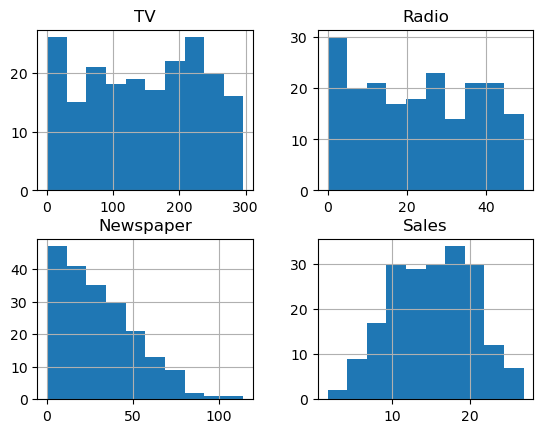

In [18]:
df.hist()
plt.show()

In [19]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


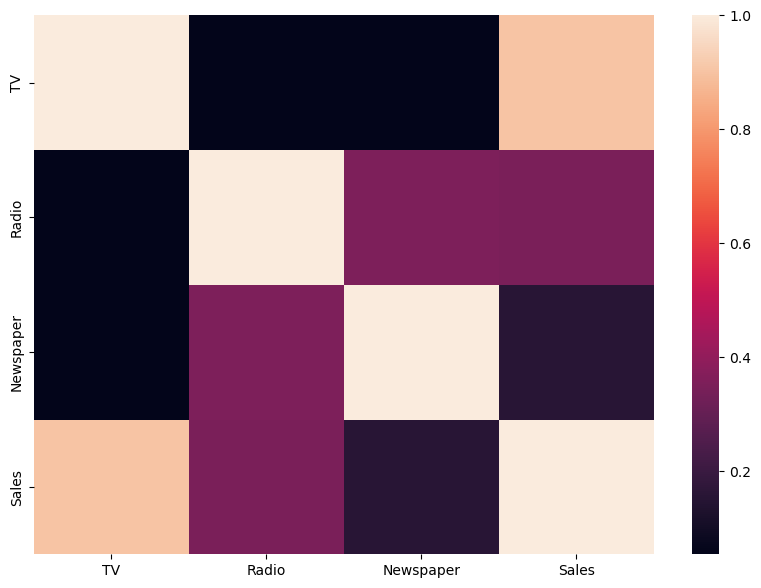

In [20]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr())
plt.show()

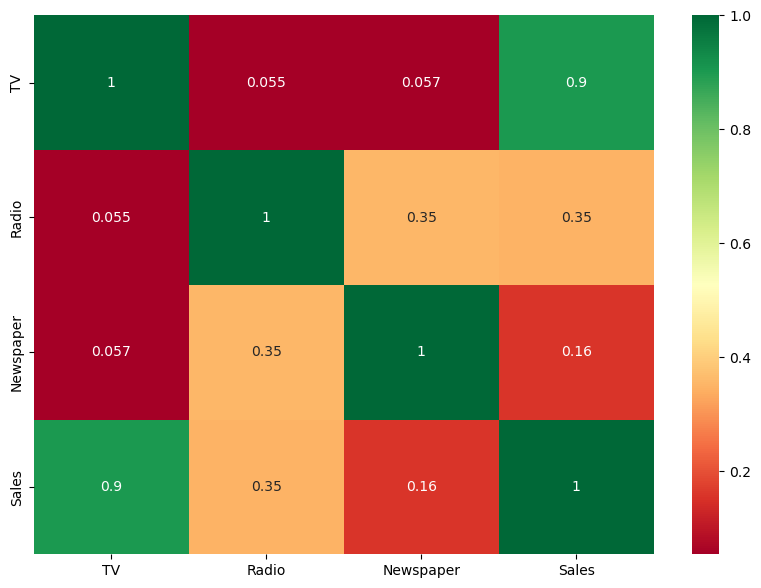

In [21]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

/home/vivek/.anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


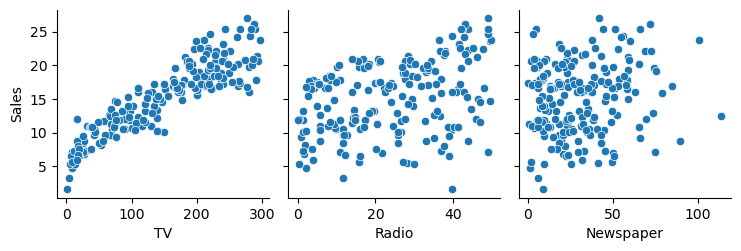

In [22]:
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",kind="scatter")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(df[['TV']],df[['Sales']],test_size=0.3,random_state=42)

In [25]:
print(x_train)

        TV
169  284.3
97   184.9
31   112.9
12    23.8
35   290.7
..     ...
106   25.0
14   204.1
92   217.7
179  165.6
102  280.2

[140 rows x 1 columns]


In [26]:
print(x_test)

        TV
95   163.3
15   195.4
30   292.9
158   11.7
128  220.3
115   75.1
69   216.8
170   50.0
174  222.4
45   175.1
66    31.5
182   56.2
165  234.5
78     5.4
186  139.5
177  170.2
56     7.3
152  197.6
82    75.3
68   237.4
124  229.5
16    67.8
148   38.0
93   250.9
65    69.0
60    53.5
84   213.5
67   139.3
125   87.2
132    8.4
9    199.8
18    69.2
55   198.9
75    16.9
150  280.7
104  238.2
135   48.3
137  273.7
164  117.2
76    27.5
79   116.0
197  177.0
38    43.1
24    62.3
122  224.0
195   38.2
29    70.6
19   147.3
143  104.6
86    76.3
114   78.2
173  168.4
5      8.7
126    7.8
117   76.4
73   129.4
140   73.4
98   289.7
172   19.6
96   197.6


In [27]:
print(y_train)

     Sales
169   20.0
97    20.5
31    11.9
12     9.2
35    17.8
..     ...
106    7.2
14    19.0
92    19.4
179   17.6
102   19.8

[140 rows x 1 columns]


In [28]:
print(y_test)

     Sales
95    16.9
15    22.4
30    21.4
158    7.3
128   24.7
115   12.6
69    22.3
170    8.4
174   16.5
45    16.1
66    11.0
182    8.7
165   16.9
78     5.3
186   10.3
177   16.7
56     5.5
152   16.6
82    11.3
68    18.9
124   19.7
16    12.5
148   10.9
93    22.2
65    11.3
60     8.1
84    21.7
67    13.4
125   10.6
132    5.7
9     15.6
18    11.3
55    23.7
75     8.7
150   16.1
104   20.7
135   11.6
137   20.8
164   11.9
76     6.9
79    11.0
197   14.8
38    10.1
24     9.7
122   16.6
195    7.6
29    10.5
19    14.6
143   10.4
86    12.0
114   14.6
173   16.7
5      7.2
126    6.6
117    9.4
73    11.0
140   10.9
98    25.4
172    7.6
96    16.7


LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LinearRegression


In [30]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
pred=lr.predict(x_test)

In [32]:
print(pred)

[[16.16109107]
 [17.92129084]
 [23.26769201]
 [ 7.84812269]
 [19.28667945]
 [11.32465432]
 [19.09475735]
 [ 9.94829874]
 [19.4018327 ]
 [16.8081427 ]
 [ 8.93385339]
 [10.28827502]
 [20.0653348 ]
 [ 7.50266292]
 [14.85602084]
 [16.53945177]
 [ 7.6068492 ]
 [18.04192759]
 [11.3356213 ]
 [20.22435596]
 [19.79116038]
 [10.92435967]
 [ 9.29028013]
 [20.96462689]
 [10.99016153]
 [10.14022083]
 [18.91380224]
 [14.84505386]
 [11.98815642]
 [ 7.66716757]
 [18.16256433]
 [11.00112851]
 [18.11321294]
 [ 8.13326408]
 [22.59870643]
 [20.26822387]
 [ 9.85507944]
 [22.21486224]
 [13.63320293]
 [ 8.71451385]
 [13.56740107]
 [16.91232898]
 [ 9.56993804]
 [10.62276781]
 [19.48956852]
 [ 9.30124711]
 [11.07789734]
 [15.28373293]
 [12.94228339]
 [11.39045618]
 [11.49464246]
 [16.44074898]
 [ 7.68361804]
 [ 7.63426664]
 [11.39593967]
 [14.30218851]
 [11.23143502]
 [23.09222038]
 [ 8.28131827]
 [18.04192759]]


In [33]:
lr.coef_

array([[0.05483488]])

In [34]:
lr.intercept_

array([7.20655455])

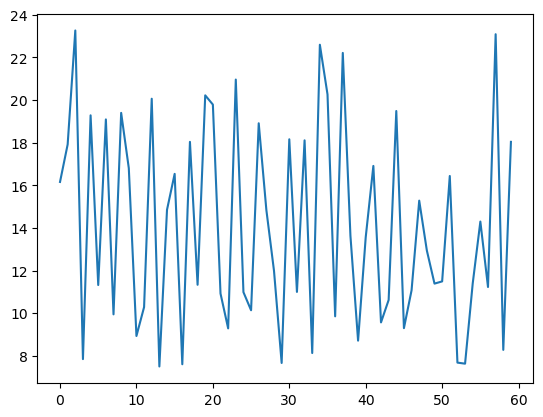

In [35]:
import matplotlib.pyplot as plt
plt.plot(pred)
plt.show()

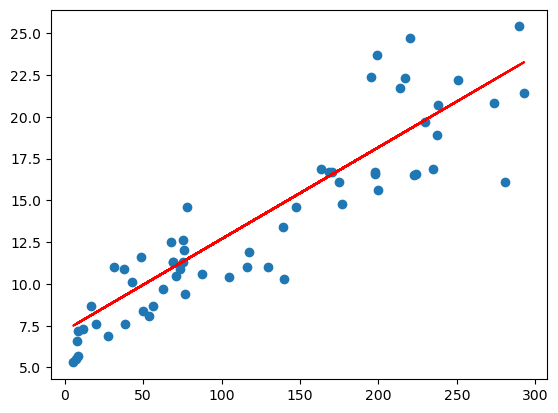

In [36]:
plt.scatter(x_test,y_test)
plt.plot(x_test,7.20655455+0.05483488*x_test,'r')
plt.show()